In [1]:
from scripts.pipeline_tools import (
    prepare_data,
    regressor_uncertainty,
    select_unstable_data,
    retrain_regressor,
    uncertainty_change,
    mse_change,
)
from scripts.Models import ITGDatasetDF, load_model, ITGDataset
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader
from scripts.utils import train_keys
import copy
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import yaml 

In [2]:
with open('pipeline_config.yaml') as f:
    cfg = yaml.load(f, Loader=yaml.FullLoader)

pretrained = cfg['pretrained']
paths = cfg['data']

In [3]:
train_data, val_data = prepare_data(
    paths['train'], paths['validation'], target_column="efiitg_gb", target_var="itg"
)

scaler = StandardScaler()
scaler.fit_transform(train_data.drop(["itg"], axis=1))

train_dataset = ITGDatasetDF(train_data, target_column="efiitg_gb", target_var="itg")
valid_dataset = ITGDatasetDF(val_data, target_column="efiitg_gb", target_var="itg")

# # TODO: further testing of the scale function
train_dataset.scale(scaler)
valid_dataset.scale(scaler)

In [4]:
# Load pretrained models
print("Loaded the following models:\n")
models = {}
for model in pretrained:
    if pretrained[model]["trained"] == True:
        trained_model = load_model(model, pretrained[model]["save_path"])
        models[model] = trained_model

Loaded the following models:

Model Loaded: ITG_class
Model Loaded: ITG_reg


In [5]:
# TODO: Needs to be the true training samples used!!!
train_sample = train_dataset.sample(10_000)


Iteration: 0


Running classifier selection...



100%|██████████| 100/100 [00:03<00:00, 26.48it/s]



Stable points: 7534
Misclassified points: 694
Percentage of misclassified points:  6.94%

Dropped 7817 rows

Running MC Dropout on Novel Data....



100%|██████████| 15/15 [00:17<00:00,  1.20s/it]



Number of points passed for MC dropout: 2183
no valid before : 2199776
no valid after : 2201414

Running MC Dropout on Training Data....



100%|██████████| 15/15 [01:29<00:00,  5.95s/it]



Number of points passed for MC dropout: 10000

Retraining regressor...

Training on 10545 points


100%|██████████| 11/11 [00:15<00:00,  1.44s/it]


Initial loss: 0.6887
Train Step:  0
Loss: 1.0485
Validation Step:  0


100%|██████████| 11/11 [00:15<00:00,  1.44s/it]


Test loss: 0.6079
Train Step:  1
Loss: 0.9082
Train Step:  2
Loss: 0.8064
Train Step:  3
Loss: 0.7299
Train Step:  4
Loss: 0.6837
Train Step:  5
Loss: 0.6568
Train Step:  6
Loss: 0.6355
Train Step:  7
Loss: 0.5981
Train Step:  8
Loss: 0.5509
Train Step:  9
Loss: 0.5177
Train Step:  10
Loss: 0.4754
Validation Step:  10


100%|██████████| 11/11 [00:16<00:00,  1.52s/it]


Test loss: 0.3428
Train Step:  11
Loss: 0.4569
Train Step:  12
Loss: 0.4428
Train Step:  13
Loss: 0.4281
Train Step:  14
Loss: 0.4110
Train Step:  15
Loss: 0.3880
Train Step:  16
Loss: 0.3667
Train Step:  17
Loss: 0.3533
Train Step:  18
Loss: 0.3417
Train Step:  19
Loss: 0.3393
Train Step:  20
Loss: 0.3211
Validation Step:  20


100%|██████████| 11/11 [00:16<00:00,  1.45s/it]


Test loss: 0.2702
Train Step:  21
Loss: 0.3041
Train Step:  22
Loss: 0.3040
Train Step:  23
Loss: 0.2988
Train Step:  24
Loss: 0.2959

Running MC Dropout on Novel Data....



100%|██████████| 15/15 [00:17<00:00,  1.16s/it]



Number of points passed for MC dropout: 2183

Running MC Dropout on Training Data....



100%|██████████| 15/15 [01:25<00:00,  5.67s/it]



Number of points passed for MC dropout: 10000

Novel Data Uncertainty changes...

 Decreased 94.862% Increased: 5.138 % No Change: 0.000 
Initial Average Uncertainty: 0.4990, Final Average Uncertainty: 0.3217

Training Data Uncertainty changes...

 Decreased 75.480% Increased: 24.510 % No Change: 0.010 
Initial Average Uncertainty: 0.1046, Final Average Uncertainty: 0.0849

Change in MSE for novel dataset: 0.5249


Change in MSE for train dataset: 0.0655


Iteration: 1


Running classifier selection...



100%|██████████| 100/100 [00:03<00:00, 27.74it/s]



Stable points: 7539
Misclassified points: 633
Percentage of misclassified points:  6.33%

Dropped 7761 rows

Running MC Dropout on Novel Data....



100%|██████████| 15/15 [00:17<00:00,  1.19s/it]



Number of points passed for MC dropout: 2239
no valid before : 2191414
no valid after : 2193094

Running MC Dropout on Training Data....



100%|██████████| 15/15 [01:30<00:00,  6.02s/it]



Number of points passed for MC dropout: 10545

Retraining regressor...

Training on 11104 points


100%|██████████| 11/11 [00:15<00:00,  1.43s/it]


Initial loss: 0.7575
Train Step:  0
Loss: 1.5066
Validation Step:  0


100%|██████████| 11/11 [00:15<00:00,  1.44s/it]


Test loss: 0.7002
Train Step:  1
Loss: 1.3632
Train Step:  2
Loss: 1.2557
Train Step:  3
Loss: 1.1860
Train Step:  4
Loss: 1.1325
Train Step:  5
Loss: 1.1011
Train Step:  6
Loss: 1.0653
Train Step:  7
Loss: 1.0354
Train Step:  8
Loss: 0.9968
Train Step:  9
Loss: 0.9515
Train Step:  10
Loss: 0.9039
Validation Step:  10


100%|██████████| 11/11 [00:15<00:00,  1.44s/it]


Test loss: 0.5995
Train Step:  11
Loss: 0.8549
Train Step:  12
Loss: 0.8103
Train Step:  13
Loss: 0.7693
Train Step:  14
Loss: 0.7434
Train Step:  15
Loss: 0.7326
Train Step:  16
Loss: 0.7155
Train Step:  17
Loss: 0.6861
Train Step:  18
Loss: 0.6515
Train Step:  19
Loss: 0.6245
Train Step:  20
Loss: 0.5954
Validation Step:  20


100%|██████████| 11/11 [00:15<00:00,  1.45s/it]


Test loss: 0.4354
Train Step:  21
Loss: 0.5809
Train Step:  22
Loss: 0.5661
Train Step:  23
Loss: 0.5475
Train Step:  24
Loss: 0.5252

Running MC Dropout on Novel Data....



100%|██████████| 15/15 [00:17<00:00,  1.19s/it]



Number of points passed for MC dropout: 2239

Running MC Dropout on Training Data....



100%|██████████| 15/15 [01:29<00:00,  6.00s/it]



Number of points passed for MC dropout: 10545

Novel Data Uncertainty changes...

 Decreased 93.202% Increased: 6.798 % No Change: 0.000 
Initial Average Uncertainty: 0.3748, Final Average Uncertainty: 0.2617

Training Data Uncertainty changes...

 Decreased 52.916% Increased: 47.084 % No Change: 0.000 
Initial Average Uncertainty: 0.0977, Final Average Uncertainty: 0.0918

Change in MSE for novel dataset: 0.2694


Change in MSE for train dataset: 0.1392


Iteration: 2


Running classifier selection...



100%|██████████| 100/100 [00:03<00:00, 27.86it/s]



Stable points: 7497
Misclassified points: 646
Percentage of misclassified points:  6.46%

Dropped 7742 rows

Running MC Dropout on Novel Data....



100%|██████████| 15/15 [00:17<00:00,  1.20s/it]



Number of points passed for MC dropout: 2258
no valid before : 2183094
no valid after : 2184788

Running MC Dropout on Training Data....



100%|██████████| 15/15 [01:34<00:00,  6.32s/it]



Number of points passed for MC dropout: 11104

Retraining regressor...

Training on 11668 points


100%|██████████| 11/11 [00:15<00:00,  1.41s/it]


Initial loss: 0.8013
Train Step:  0
Loss: 1.8716
Validation Step:  0


100%|██████████| 11/11 [00:15<00:00,  1.42s/it]


Test loss: 0.7636
Train Step:  1
Loss: 1.7481
Train Step:  2
Loss: 1.6529
Train Step:  3
Loss: 1.5775
Train Step:  4
Loss: 1.5031
Train Step:  5
Loss: 1.4360
Train Step:  6
Loss: 1.3739
Train Step:  7
Loss: 1.3163
Train Step:  8
Loss: 1.2677
Train Step:  9
Loss: 1.2338
Train Step:  10
Loss: 1.1990
Validation Step:  10


100%|██████████| 11/11 [00:15<00:00,  1.44s/it]


Test loss: 0.7903
Train Step:  11
Loss: 1.1454
Train Step:  12
Loss: 1.0885
Train Step:  13
Loss: 1.0400
Train Step:  14
Loss: 0.9943
Train Step:  15
Loss: 0.9642
Train Step:  16
Loss: 0.9484
Train Step:  17
Loss: 0.9326
Train Step:  18
Loss: 0.8990
Train Step:  19
Loss: 0.8579
Train Step:  20
Loss: 0.8135
Validation Step:  20


100%|██████████| 11/11 [00:16<00:00,  1.46s/it]


Test loss: 0.5468
Train Step:  21
Loss: 0.7893
Train Step:  22
Loss: 0.7697
Train Step:  23
Loss: 0.7591
Train Step:  24
Loss: 0.7176

Running MC Dropout on Novel Data....



100%|██████████| 15/15 [00:18<00:00,  1.24s/it]



Number of points passed for MC dropout: 2258

Running MC Dropout on Training Data....



100%|██████████| 15/15 [01:39<00:00,  6.66s/it]



Number of points passed for MC dropout: 11104

Novel Data Uncertainty changes...

 Decreased 81.915% Increased: 18.085 % No Change: 0.000 
Initial Average Uncertainty: 0.2795, Final Average Uncertainty: 0.2237

Training Data Uncertainty changes...

 Decreased 52.621% Increased: 47.379 % No Change: 0.000 
Initial Average Uncertainty: 0.1001, Final Average Uncertainty: 0.0945

Change in MSE for novel dataset: 0.3147


Change in MSE for train dataset: 0.1434


Iteration: 3


Running classifier selection...



100%|██████████| 100/100 [00:04<00:00, 24.64it/s]



Stable points: 7508
Misclassified points: 665
Percentage of misclassified points:  6.65%

Dropped 7733 rows

Running MC Dropout on Novel Data....



100%|██████████| 15/15 [00:19<00:00,  1.31s/it]



Number of points passed for MC dropout: 2267
no valid before : 2174788
no valid after : 2176489

Running MC Dropout on Training Data....



100%|██████████| 15/15 [01:44<00:00,  6.97s/it]



Number of points passed for MC dropout: 11668

Retraining regressor...

Training on 12234 points


100%|██████████| 11/11 [00:15<00:00,  1.43s/it]


Initial loss: 0.8102
Train Step:  0
Loss: 2.1314
Validation Step:  0


100%|██████████| 11/11 [00:15<00:00,  1.44s/it]


Test loss: 0.7745
Train Step:  1
Loss: 1.9692
Train Step:  2
Loss: 1.8457
Train Step:  3
Loss: 1.7520
Train Step:  4
Loss: 1.6643
Train Step:  5
Loss: 1.5898
Train Step:  6
Loss: 1.5340
Train Step:  7
Loss: 1.4818
Train Step:  8
Loss: 1.4509
Train Step:  9
Loss: 1.4319
Train Step:  10
Loss: 1.4114
Validation Step:  10


100%|██████████| 11/11 [00:16<00:00,  1.51s/it]


Test loss: 1.0069
Train Step:  11
Loss: 1.3823
Train Step:  12
Loss: 1.3406
Train Step:  13
Loss: 1.2878
Train Step:  14
Loss: 1.2294
Train Step:  15
Loss: 1.1629
Train Step:  16
Loss: 1.1321
Train Step:  17
Loss: 1.1257
Train Step:  18
Loss: 1.1266
Train Step:  19
Loss: 1.1140
Train Step:  20
Loss: 1.0736
Validation Step:  20


100%|██████████| 11/11 [00:16<00:00,  1.54s/it]


Test loss: 0.6115
Train Step:  21
Loss: 1.0286
Train Step:  22
Loss: 0.9875
Train Step:  23
Loss: 0.9561
Train Step:  24
Loss: 0.9438

Running MC Dropout on Novel Data....



100%|██████████| 15/15 [00:19<00:00,  1.27s/it]



Number of points passed for MC dropout: 2267

Running MC Dropout on Training Data....



100%|██████████| 15/15 [01:48<00:00,  7.23s/it]



Number of points passed for MC dropout: 11668

Novel Data Uncertainty changes...

 Decreased 87.809% Increased: 12.191 % No Change: 0.000 
Initial Average Uncertainty: 0.2519, Final Average Uncertainty: 0.1925

Training Data Uncertainty changes...

 Decreased 52.228% Increased: 47.772 % No Change: 0.000 
Initial Average Uncertainty: 0.1009, Final Average Uncertainty: 0.0912

Change in MSE for novel dataset: 0.0923


Change in MSE for train dataset: 0.1749



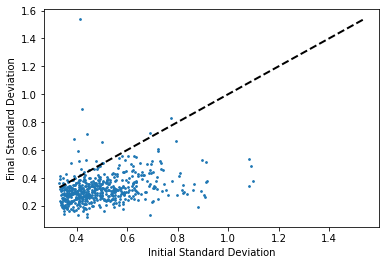

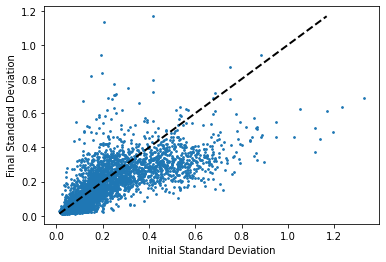

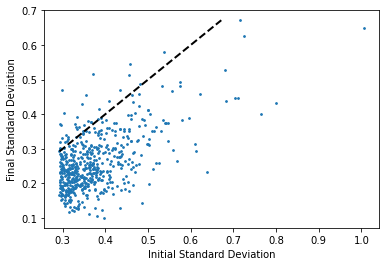

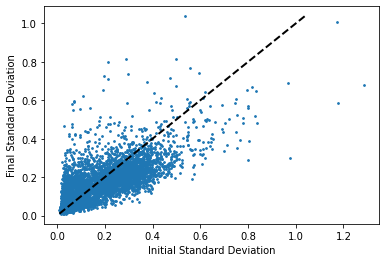

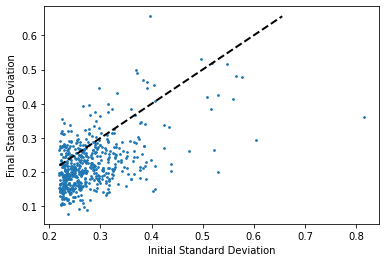

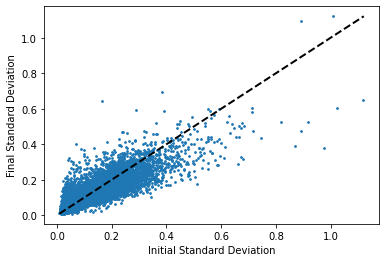

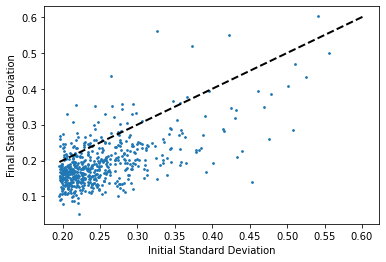

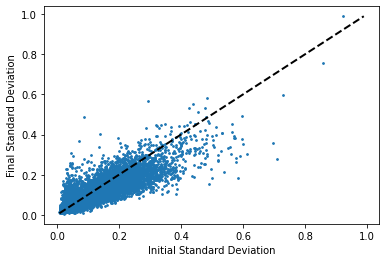

In [6]:
init_epoch = 25
iterations = 4
train_losses = []
test_losses = []
for i in range(iterations):
    print(f"\nIteration: {i}\n")
    valid_sample = valid_dataset.sample(10_000)

    # remove the sampled data points from the dataset
    valid_dataset.remove(valid_sample.data.index)

    select_unstable_data(valid_sample, batch_size=100, classifier=models["ITG_class"])

    uncertain_datset, uncert_before, data_idx = regressor_uncertainty(
    valid_sample, models["ITG_reg"], n_runs=15, keep=0.25,valid_dataset=valid_dataset
)
    train_sample_origin, train_uncert_before, train_uncert_idx = regressor_uncertainty(
        train_sample, models["ITG_reg"], n_runs=15,train_data=True,
        )

    train_sample.add(uncertain_datset)

    uncertain_loader = DataLoader(train_sample, batch_size=len(train_sample), shuffle=True)

    prediction_before, prediction_idx_order = models["ITG_reg"].predict(uncertain_loader)

    # Switching validation dataset to numpy arrays to see if it is quicker
    x_array = valid_dataset.data[train_keys].values
    y_array = valid_dataset.data["itg"].values
    z_array = valid_dataset.data["efiitg_gb"].values
    dataset_numpy = ITGDataset(x_array, y_array, z_array)
    valid_loader = DataLoader(
        dataset_numpy, batch_size=int(0.1 * len(y_array)), shuffle=True
    )

    # Retrain Regressor (Further research required)
    epochs = init_epoch * (i+1)
    train_loss, test_loss = retrain_regressor(
        uncertain_loader,
        valid_loader,
        models["ITG_reg"],
        learning_rate=1e-3,
        epochs=25,
        validation_step=True,
        mode="shrink_perturb",
    )

    train_losses.append(train_loss)
    test_losses.append(test_loss)

    prediction_after,_ = models["ITG_reg"].predict(uncertain_loader, prediction_idx_order)

    _, uncert_after,_ = regressor_uncertainty(valid_sample, models["ITG_reg"], n_runs=15, keep=0.25, order_idx=data_idx)
    _, train_uncert_after,_ = regressor_uncertainty(train_sample_origin, models["ITG_reg"], n_runs=15,order_idx=train_uncert_idx, train_data=True)
   
    print("\nNovel Data Uncertainty changes...\n")
    uncertainty_change(x=uncert_before, y=uncert_after);

    print("\nTraining Data Uncertainty changes...\n")
    uncertainty_change(x=train_uncert_before, y=train_uncert_after);
    
    mse_change(prediction_before, prediction_after,prediction_idx_order,data_idx, uncertain_loader,[uncert_before, uncert_after])

    mse_change(
    prediction_before,
    prediction_after,
    prediction_idx_order,
    train_uncert_idx,
    uncertain_loader,
    uncertainties=[train_uncert_before, train_uncert_after],
    data="train"
     )

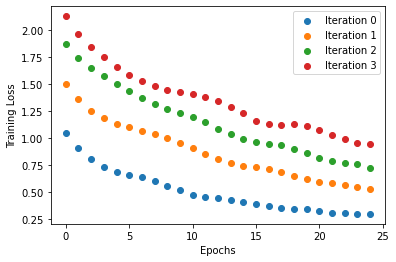

In [10]:
plt.figure()
for i in range(len(train_losses)):
    plt.scatter(np.arange(0,len(train_losses[i])), train_losses[i], label =f"Iteration {i}");
    plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Training Loss");

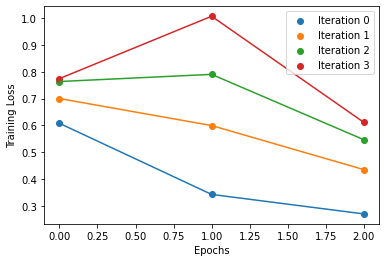

In [14]:
plt.figure()
for i in range(len(test_losses)):
    plt.plot(np.arange(0,len(test_losses[i])), test_losses[i]);
    plt.scatter(np.arange(0,len(test_losses[i])), test_losses[i], label = f"Iteration {i}");
    
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Training Loss");